<a href="https://colab.research.google.com/github/suhyeon03/study_ML_/blob/main/_text_mining_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 텍스트 분석

* 텍스트 분류
  - 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
* 감성 분석
  - 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적 요소를 분석하는 기법
* 텍스트 요약
  - 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
* 텍스트 군집화와 유사도 측정
  - 비슷한 유형의 문서에 대해서 군집화를 수행하는 기법
  - 텍스트 분류를 비지도 학습으로 수행하는 방법의 일환
  - 유사도 측정 역시 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법이다.

In [ ]:
# 텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것이다. 지금까지 ML모델은 주어진 정형 데이터기반에서 모델을 수립하고 예측을 수행했다.
# 텍스트를 머신어닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가 하는것이
# 매우 중요한 요소이다.
# 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데
# 이렇게 변환하는 것을 피처벡터화, 피처추출이라고 한다. 대표적으로 BOW와 Word2Vec 방법이 있다.

In [ ]:
# 텍스트 분석 수행 프로세스
# step 1
# 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어등의 토큰화 작업, 의미없는 단어 제거 작업
#                               어근 추출 등의 텍스트 정규화 작업을 수행하는 것을 통칭한다.
# step 2
# 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당한다. 대표적인 방법인 방법은 BOW와 Word2Vec이 있으며, BOW는 대표적으로 Count기반과 TF-IDF 기반 벡터화가 있다.
# step 3
# ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행한다.

In [ ]:
# 사이킷런은 머신러닝 위주 라이브러리여서 NLP를 위한 다양한라이브러리를 가지고 있지않다.
# 더 다양한 텍스트 부넉이 적용돼야하는 경우 보통은 NLTK/Gensim/SpaCy와 같은 NLP 전용 패키지와 함께 결합해 어플리케이션을 작성하는 경우가 많다.

#2.텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

* 클렌징
  - 불필요한 문자, 기호 등을 사전에 제거하는 작업 ex.HTML, XML 태그나 특정기호
* 토큰화
  - 문장 토큰화 vs 단어 토큰화
* 필터링/스톱워드제거/철자수정
* stemming
* Lemmatization



## 2-1.문장 토큰화

In [ ]:
import nltk
nltk.download('punkt_tab')  # punkt만 정확히 다운로드

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk import sent_tokenize

text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


## 2-2.단어 토큰화

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


##2-3. 여러 문장들에 대한 단어 토큰화

In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


##2-4.n-gram

In [ ]:
from nltk import ngrams

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

all_ngrams = ngrams(words, 2)
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix'), ('Matrix', 'is'), ('is', 'everywhere'), ('everywhere', 'its'), ('its', 'all'), ('all', 'around'), ('around', 'us'), ('us', ','), (',', 'here'), ('here', 'even'), ('even', 'in'), ('in', 'this'), ('this', 'room'), ('room', '.')]


##2-5.Stopwords 제거

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:40])

영어 stop words 갯수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다.
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


##2-6.Stemming과 Lemmatization

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


#3.Bag of Words - BOW

In [ ]:
# Bag of Words 모델은 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처 값을 추출하는 모델이다.
# step1
# 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열한다. 그러고 나서 각 단어에 고유의 인덱스를 다음과 같이 부여한다.
# step2
# 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재한다. 예를 들어 base-ball은 문장1,2에서 총 2번 나타나며, daughter는 문장1에서만 1번 나타남

# 단점
# 문맥 의미 반영 부족 - 단어의 순서 고려 X
# 희소 행렬 문제

# BOW의 피처 벡터화 방식
# 1. 카운트 기반의 벡터화
#    단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 count를 부여하는 경우를 카운터 벡터화라고 한다.
#    카운트 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식된다.
#    그러나 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여한다.
# 2. TF-IDE 기반의 벡터화
#    자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여한다.
#    - 만일 어떤 문서에서 특정단어가 자주 나타나면 그 단어는 해당 문서를 특징짓는 중요단어일 수 있다. 하지만 그 단어가 다른 문서에서도 자주 나타나는 단어라면
#      해당 단어는 언어 특성상 범용적으로 자주 사용되는 단어일 가능성이 높다.
# 텍스트가 길고, 문서의 개수가 많을 경우 TF-IDF 방식을 사용하는 것이 더 좋은 예측성능을 보장할 수 있다.

In [ ]:
# 사이킷런 CountVectorizer 테스트
text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room. \
                  You can see it out your window or on your television. \
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01); text.append(text_sample_02)
print(text,"\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                   You can see it out your window or on your television.                   You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


In [ ]:
# CountVectorizer객체 생성 후 fit(), transform()으로 텍스트에 대한 feature vectorization 수행
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer()

In [ ]:
ftr_vect = cnt_vect.transform(text)

In [ ]:
# 피처 벡터화 후 데이터 유형 및 여러 속성 확인
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse._csr.csr_matrix'> (2, 51)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 56 stored elements and shape (2, 51)>
  Coords	Values
  (0, 0)	1
  (0, 2)	1
  (0, 6)	1
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 15)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	2
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	3
  (0, 25)	1
  (0, 26)	1
  (0, 30)	1
  (0, 31)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	2
  :	:
  (1, 1)	4
  (1, 3)	1
  (1, 4)	2
  (1, 5)	1
  (1, 8)	1
  (1, 9)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	2
  (1, 27)	2
  (1, 28)	1
  (1, 29)	1
  (1, 32)	1
  (1, 33)	1
  (1, 34)	1
  (1, 35)	2
  (1, 38)	4
  (1, 40)	1
  (1, 42)	1
  (1, 43)	1
  (1, 44)	1
  (1, 47)	1
  (1, 49)	7
  (1, 50)	1


In [ ]:
print(cnt_vect.vocabulary_)

{'the': 38, 'matrix': 22, 'is': 19, 'everywhere': 11, 'its': 21, 'all': 0, 'around': 2, 'us': 41, 'here': 15, 'even': 10, 'in': 18, 'this': 39, 'room': 30, 'you': 49, 'can': 6, 'see': 31, 'it': 20, 'out': 25, 'your': 50, 'window': 46, 'or': 24, 'on': 23, 'television': 37, 'feel': 12, 'when': 45, 'go': 13, 'to': 40, 'work': 48, 'church': 7, 'pay': 26, 'taxes': 36, 'take': 35, 'blue': 5, 'pill': 27, 'and': 1, 'story': 34, 'ends': 9, 'wake': 42, 'bed': 3, 'believe': 4, 'whatever': 44, 'want': 43, 'red': 29, 'stay': 33, 'wonderland': 47, 'show': 32, 'how': 17, 'deep': 8, 'rabbit': 28, 'hole': 16, 'goes': 14}


In [ ]:
cnt_vect = CountVectorizer(max_features=5, stop_words='english')
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'> (2, 5)
{'blue': np.int64(2), 'pill': np.int64(4), 'bed': np.int64(0), 'believe': np.int64(1), 'deep': np.int64(3)}


In [ ]:
# ngram_range 확인
cnt_vect = CountVectorizer(ngram_range=(1,3))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'> (2, 201)
{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, 

##3-1.희소 행렬 - COO 형식

In [ ]:
# 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가르키는 행과 열의 위치를 별도의 배열로 저장하는 방식

import numpy as np

dense = np.array( [ [ 3, 0, 1 ],
                    [0, 2, 0 ] ] )

In [ ]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [ ]:
print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse._coo.coo_matrix'>
<COOrdinate sparse matrix of dtype 'int64'
	with 3 stored elements and shape (2, 3)>
  Coords	Values
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


##3-2.희소 행렬 – CSR 형식

In [ ]:
# coo형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
print(sparse_csr)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13 stored elements and shape (6, 6)>
  Coords	Values
  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

#4.텍스트 분류 실습 - 20 뉴스그룹 분류

##4-1. 텍스트 정규화

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [ ]:
# 내용을 제와하고 제목등의 다른 정보는 제거한다. 왜냐하면 제목과 소속, 이메일 주소등의 헤더와 푸더 정보들은
# 뉴스그룹 분류의 Target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많기때문이다.
# 이 퍼처들을 포함하게 되면 왠만한 ML 알고리즘을 적용해도 상당히 높은 예측성능을 나타낸다.
# 따라서 이들 헤더와 푸더 정보를 포함하는 것은 이 장에서 수행하려는 텍스트 분석의 의도를 벗어나기에 순수한 텍스트만으로 구성된
# 기사 내용으로 어떤 뉴스그룹에 속하는지 분류한다.

from sklearn.datasets import fetch_20newsgroups

# subset = 'train'으로 학습용 데이터만 추출, remove=('headers','footers','quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target

# subset = 'test'으로 테스트만 추출, remove=('headers','footers','quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'), random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))


학습 데이터 크기 11314, 테스트 데이터 크기 7532


##4-2. 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [ ]:
# 테스트데이터에서 CountVectorizer를 적용할 때는 반드시 학습 데이터를 이용해 fit()이 수행된 CountVectorizer 객체를
# 이용해 테스트 데이터를 변환해야 한다는 것이다. 그래야만 학습시 설정된 CountVertorizer의 피처 개수와 테스트 데이터를 CountVectorizer로 변횐할
# 피처 개수가 같아진다.
# 테스트 데이터의 피처 벡터화 시 fit_transform()을 사용하면 안 된다는 점도 유의해야한다.
# CountVectorizer.fit_transform(테스트 데이터)을 테스트 데이터 세트에 적용하면 테스트 데이터 기반으로 다시 CountVectorizer가 fit()을 수행하고 transform()하기
# 때문에 학습 시 사용된 피처 개수와 예측 시 사용할 피처 개수가 달라진다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 텍스트 데이터를 피처 벡터화 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:', X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.604


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogistcRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.674456


In [ ]:
# 텍스트분석에서 머신러닝 모델의 성능을 향상시키는 중요한 2가지 방법은 최적의 ML 알고리즘을 선택하는 것과 최상의 피처 전처리를 수행하는 것이다.
# 텍스트 정규화나 Count/TF-IDF 기반 피처 벡터화를 어떻게 효과적으로 적용했는지가 텍스트 기반의 머신러닝 성능에 큰 영향을 미칠 수 있다.
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경해 피처 벡터화 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [ ]:
# GridSearchCV를 이용해 로지스틱 회귀의 하이퍼파라미터 최적화 수행
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정.
params = {'C': [0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C값으로 학습된 grid_cv로 예측 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


##4-3. 사이킷런 파이프라인 사용 및 GridSearchCV와의 결합

In [ ]:
# 사이킷런의 pipeline 클래스를 이용하면 피처 벡터화와 ML 알고리즘 학습/예측을 위한 코드 작성을 한 번에 진행할 수 있다.
# 이 코드는 TfidfVectorizer 객체를 tfidf_vect라는 객체 변수명으로, logisticRegression 객체를 lr_clf라는 객체 변수명으로
# 생성한 뒤 이 두 개의 객체를 파이프라인으로 연결하는 Pipeline 객체 pipeline을 생성한다는 의미이다. 또한 다음 코드를 보면
# 기존 TfIdfVectorizer의 학습 데이터와 테스트 데이터에 대한 fit()과 transform()수행을 통한 피처 벡터화와 LogisticRegressor의
# fit() 과 predict() 수행을 통한 머신러닝 모델의 학습과 예측이 Pipeline의 fit()과 predict()로 통일돼 수행됨을 알 수 있다.

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')), ('lr_clf', LogisticRegression(random_state=156))])

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression 객체를 lr_clf로 생성하는 pipline 생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])
# 별도의 TfidfVectorizer 객체의 fit(), transform()과 LogisticRegression의 fit() 과 predict()가 필요없음
# pipline이 fit과 predict만으로 한꺼번에 피처 벡터화와 ML학습/예측이 가능.

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))



Pipeline을 통한 Logistic Regression의 예측 정확도는 0.701


In [ ]:
# GridSearchCV에 pipeline을 입력하면서 TfidfVectorizer의 파라미터와
# LogisticRegression의 하이퍼파라미터를 함께 최적화한다.
# 다만 key값을 살펴보면 'tfidf_vect__ngram_range'와 같이 하이퍼 파라미터명이 객체 변수명과 결합돼 제공된다.
# pipeline을 gridsearchCV에 인자로 입력되면 GridSearchCV는 Pipeline을 구성하는 피처 벡터화 객체의 파라미터와
# Estimator 객체의 하이퍼 파라미터를 각각 구별할 수 있어야하는데, 이때 개별 객체 명과 파라미터명/하이퍼 파라미터명을 결합해
# Key 값으로 할당하는 것이다.

# 로지스틱 회귀외에 서포트 벡터머신과 나이브 베이즈알고리즘도 희소행렬기반의 텍스트 분류에 자주 사용되는 머신러닝 알고리즘이다.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될
# 파라미터/하이퍼 파라미터 이름과 값을 설정. .
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)} 0.7550828826229531
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.702


#5.감정분석

In [ ]:
# 감정분석에는 두 가지 방식이 있다.
# 1. 지도학습은 학습 데이터와 타깃 레이블 값을 기반으로 감정 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을
# 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일하다.
# 2. 비지도학습은 'Lexicon'이라는 일종의 감성 어휘 사전을 이용한다. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며,
# 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단한다.

##5-1. 지도학습 기반 감정 분석실습 - IMDB 영화평

In [1]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [2]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [3]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub("[^a-zA-Z]", " ", x))

In [5]:
from sklearn.model_selection import train_test_split
class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((3226, 1), (1383, 1))

In [7]:
# Count 벡터화

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, ngram은 (1,2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range = (1,2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# Piplline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))


예측 정확도는 0.8590, ROC-AUC는 0.9254


In [8]:
# TF-IDF
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행.
# logisticRegression의 C는 10으로 설정

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range = (1,2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))



예측 정확도는 0.8583, ROC-AUC는 0.9365


##5-2. 비지도학습 기반 감성 분석 소개

In [ ]:
# 많은 감성 분석용 데이터는 이러한 결정된 레이블 값을 가지고 있지 않다. 이러한 경우는 Lexicon은 유용하게 사용될 수 있다.
# NLTK 패키지의 WordNet은 방대한 영어 어휘 사전이다. 그러나 단순한 어휘사전이 아닌 시맨틱 분석을 제공하는 어휘사전이다.
# 시맨틱은 문맥상 의미를 뜻한다.
# WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사로 구성된 개별 단어를
# Synset이라는 개념을 이용해 표현한다. Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨틱 정보를 제공하는 WordNet의 핵심이다.

###5-2-1. SentiWordNet을 이용한 감성분석

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [10]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성.

synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [11]:
for synset in synsets :
    print('##### Synset name : ', synset.name(), '#####')
    print('POS :', synset.lexname())
    print('Definition :', synset.definition())
    print('Lemmas :', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas : ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition : something presented as a gift
Lemmas : ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking
Lemmas : ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition : give an exhibition of to an interested audience
Lemmas : ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition : bring forward and present to the mind
Lemmas : ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition : perform (a play), especially on a stage
Lemmas : ['stage', 'present

In [12]:
# synset 객체를 단어별로 생성한다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장한다.
similarity_df = pd.DataFrame(similarities, columns = entity_names, index=entity_names)
similarity_df


,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [15]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [17]:
# sentisynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성을 나타내는 객관성 지수를 가지고 있다.
# 감성지수는 다시 긍정 감성 지수와 부정 감성 지수로 나뉜다.

import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')

print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:', fabulous.pos_score())
print('fabulous 부정감성 지수:', fabulous.neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수: 0.875
fabulous 부정감성 지수: 0.125


In [ ]:
# SentiWordNet을 이용한 영화 감상평 감성 분석
# 1. 문서를 문장 단위로 분해
# 2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
# 3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
# 4. senti_synset 객체에서 긍정/부정 감성지수를 구하고 이를 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는
#    부정 감성으로 결정

In [18]:
from nltk.corpus import wordnet as wn
# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
       return wn.ADJ
    elif tag.startswith('N'):
       return wn.NOUN
    elif tag.startswith('R'):
       return wn.ADV
    elif tag.startswith('V'):
       return wn.VERB

In [19]:
# 문장 -> 단어 토큰 -> 품사 태깅
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1

        if not tokens_count:
            return 0

        # 총 score가 0 이상일 경우 긍정 (positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
        if sentiment >= 0:
            return 1

        return 0

In [20]:
# swn_polarity(text) 함수를 IMDB 감사평의 개별 문서에 적용해 긍정 및 부정 감성을 예측
# review_df의 새로운 칼럼으로 'preds'를 추가해 이 칼럼에 swn_polarity(text)로 반환된 감성 평가를 담는다.
# 그리고 실제 감성 평가인 'sentiment' 칼럼과 swn_polarity(text)로 반환된 결과를 평가한다.

review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print(confusion_matrix( y_target, preds))
print("정확도:", accuracy_score(y_target , preds))
print("정밀도:", precision_score(y_target , preds))
print("재현율:", recall_score(y_target, preds))

[[1353  937]
 [ 665 1654]]
정확도: 0.6524191798654806
정밀도: 0.6383635661906599
재현율: 0.7132384648555412


###5-2-2. VADER를 이용한 감성분석

In [ ]:
# VADER는 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon이다.

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [23]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)

    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

In [24]:
print('#### VADER 예측 성능 평가 ####')
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print(confusion_matrix( y_target, vader_preds))
print("정확도:", accuracy_score(y_target , vader_preds))
print("정밀도:", precision_score(y_target , vader_preds))
print("재현율:", recall_score(y_target, vader_preds))

#### VADER 예측 성능 평가 ####
[[1232 1058]
 [ 318 2001]]
정확도: 0.7014536775873291
정밀도: 0.6541353383458647
재현율: 0.8628719275549805


#6.토픽 모델링 - 20 뉴스그룹

In [ ]:
# 토픽 모델링이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다.
# 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모된다.
# 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA, LDA가 있다. 이번 절에는 LDA를 사용하고 차원축소의 LDA와 다른 용어이다.

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [4]:
count_vect.get_feature_names_out()

array(['00', '000', '01', '02', '03', '04', '05', '10', '100', '11', '12',
       '128', '13', '14', '15', '16', '17', '18', '19', '1990', '1991',
       '1992', '1993', '20', '200', '21', '22', '23', '24', '24 bit',
       '25', '256', '26', '27', '28', '29', '30', '300', '31', '32', '35',
       '3d', '40', '44', '50', '500', '60', '80', '800', '90', '91', '92',
       '93', 'ability', 'able', 'ac', 'accept', 'accepted', 'access',
       'according', 'act', 'action', 'actions', 'acts', 'actually', 'add',
       'added', 'addition', 'address', 'adl', 'advance', 'age', 'ago',
       'agree', 'aids', 'al', 'allow', 'american', 'amiga', 'analysis',
       'anonymous', 'anonymous ftp', 'answer', 'answers', 'anti',
       'anybody', 'apartment', 'apparently', 'appear', 'appears',
       'application', 'applications', 'apply', 'appreciate',
       'appreciated', 'approach', 'appropriate', 'april', 'arab', 'arabs',
       'archive', 'area', 'areas', 'aren', 'argic', 'argument', 'armenia',
  

In [5]:
# LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA수행
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [6]:
# 각 토픽 모델링 주제별 단어들의 연관도 확인
#lda객체의 components_ 속성은 주제별로 개별 단어들의 연관도 정규화 숫자가 들어있음
#shape는 주제 개수 X 피처 단어 개수
#components_ 에 들어 있는 숫자값은 각 주제별로 단어가 나타난 횟수를 정규화 하여 나타냄.
#숫자가 클 수록 토픽에서 단어가 차지하는 비중이 높음

print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

In [7]:
def display_topic_words(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('\nTopic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([str(feature_names[i]) for i in top_indexes])
        #feature_concat = ' + '.join([str(feature_names[i])+'*'+str(round(topic[i],1)) for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topic_words(lda, feature_names, 15)

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출.


Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11

Topic # 1
don just like know think good time ve does way really people want ll right

Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02

Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed

Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace

Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server

Topic # 6
god people jesus church believe say christ does christian think christians did know bible man

Topic # 7
thanks use using does help like display need problem know server screen windows window program


In [8]:
#  개별 문서별 토픽 분포 확인
# lda객체의 transform()을 수행하면 개별 문서별 토픽 분포를 반환함.

doc_topics = lda.transform(feat_vect)
print(doc_topics.shape)
print(doc_topics[:3])

(7862, 8)
[[0.01389159 0.4167286  0.01389166 0.01394463 0.01389457 0.01389782
  0.01392313 0.49982799]
 [0.3807043  0.60656453 0.00212172 0.00212189 0.00212118 0.00212221
  0.00212166 0.00212251]
 [0.00544098 0.71518021 0.25216591 0.00543855 0.00544206 0.00544487
  0.00543991 0.00544752]]


In [9]:
# 개별 문서별 토픽 분포도를 출력
# 20newsgroup으로 만들어진 문서명을 출력.
# fetch_20newsgroups()으로 만들어진 데이터의 filename속성은 모든 문서의 문서명을 가지고 있음.
# filename속성은 절대 디렉토리를 가지는 문서명을 가지고 있으므로 '\'로 분할하여 맨 마지막 두번째 부터 파일명으로 가져옴

def get_filename_list(newsdata):
    filename_list=[]

    for file in newsdata.filenames:
            #print(file)
            filename_temp = file.split('\\')[-2:]
            filename = '.'.join(filename_temp)
            filename_list.append(filename)

    return filename_list

filename_list = get_filename_list(news_df)
print("filename 개수:",len(filename_list), "filename list 10개만:",filename_list[:10])

filename 개수: 7862 filename list 10개만: ['/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38810', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59449', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38461', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.windows.x/66959', '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104487', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53875', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53617']


In [10]:
news_df.filenames

array(['/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630',
       '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422',
       '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765',
       ...,
       '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/102656',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53606',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76505'],
      dtype='<U86')

In [11]:
# DataFrame으로 생성하여 문서별 토픽 분포도 확인

import pandas as pd

topic_names = ['Topic #'+ str(i) for i in range(0, 8)]
doc_topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
doc_topic_df.head(20)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7
/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630,0.013892,0.416729,0.013892,0.013945,0.013895,0.013898,0.013923,0.499828
/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422,0.380704,0.606565,0.002122,0.002122,0.002121,0.002122,0.002122,0.002123
/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765,0.005441,0.715180,0.252166,0.005439,0.005442,0.005445,0.005440,0.005448
/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38810,0.005440,0.437354,0.005449,0.005440,0.005443,0.529984,0.005445,0.005444
/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59449,0.006583,0.891476,0.068998,0.006592,0.006589,0.006589,0.006589,0.006585
/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38461,0.008341,0.762012,0.187925,0.008335,0.008339,0.008344,0.008344,0.008359
/root/scikit_learn_data/20news_home/20news-bydate-train/comp.windows.x/66959,0.399332,0.041667,0.350541,0.041694,0.041675,0.041701,0.041667,0.041724
/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104487,0.203226,0.767906,0.004813,0.004811,0.004812,0.004810,0.004812,0.004810
/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53875,0.008950,0.937410,0.008931,0.008944,0.008937,0.008961,0.008932,0.008935
/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53617,0.041713,0.041737,0.708129,0.041675,0.041671,0.041670,0.041705,0.041700


#7.문서 군집화 소개와 실습

In [ ]:
# 문서군집화는 비슷한 텍스트 구성의 문서를 군집화하는 것이다.
# 문서 군집화는 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 앞에서
# 소개한 텍스트 분류 기반의 문서 분류와 유사하다.
# 하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 반해,
# 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작한다.

##7-1. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [13]:
import zipfile
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)

# ✅ 업로드된 zip 파일 이름 (파일명을 업로드된 그대로 사용해야 함)
zip_file = 'topics.zip'

# ✅ 1. 압축 해제 (현재 디렉토리에 examples, topics, scripts 등이 생김)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# ✅ 2. topics 폴더 경로 지정
path = 'topics'

# ✅ 3. topics 폴더 내 모든 .txt.data 파일 수집
#all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.txt.data')]

# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
#all_files = glob.glob(os.path.join(path, "*.txt.data"))
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.txt.data')]
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_ ,index_col=None, header=0,encoding='latin1')
    # 절대경로로 주어진 파일명을 가공. Linux에서 수행 시에는 아래 \\를 / 변경.
    # 맨 마지막 .data확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,topics/size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k..."
1,topics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now..."
2,topics/service_swissotel_hotel_chicago,Mediocre room and service for a very extravagant price .\n0 ...
3,topics/performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One..."
4,topics/seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ..."


In [14]:
print(all_files)

['topics/size_asus_netbook_1005ha.txt.data', 'topics/battery-life_netbook_1005ha.txt.data', 'topics/service_swissotel_hotel_chicago.txt.data', 'topics/performance_netbook_1005ha.txt.data', 'topics/seats_honda_accord_2008.txt.data', 'topics/features_windows7.txt.data', 'topics/rooms_swissotel_chicago.txt.data', 'topics/interior_honda_accord_2008.txt.data', 'topics/location_holiday_inn_london.txt.data', 'topics/accuracy_garmin_nuvi_255W_gps.txt.data', 'topics/eyesight-issues_amazon_kindle.txt.data', 'topics/speed_windows7.txt.data', 'topics/interior_toyota_camry_2007.txt.data', 'topics/food_holiday_inn_london.txt.data', 'topics/battery-life_amazon_kindle.txt.data', 'topics/service_holiday_inn_london.txt.data', 'topics/rooms_bestwestern_hotel_sfo.txt.data', 'topics/quality_toyota_camry_2007.txt.data', 'topics/fonts_amazon_kindle.txt.data', 'topics/sound_ipod_nano_8gb.txt.data', 'topics/satellite_garmin_nuvi_255W_gps.txt.data', 'topics/voice_garmin_nuvi_255W_gps.txt.data', 'topics/keyboard

In [23]:
# TfidfVectorizer의 tokenizer인자로 사용될 lemmatization 어근 변환 함수를 설정.

from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [22]:
# TF-IDF 기반 Vectorization 적용 및 KMeans 군집화 수행.
# Stemming과 Lemmatization 같은 어근 변환은 TfidfVectorizer에서 직접 지원하진 않으나 tokenizer 파라미터에 커스텀 어근 변환 함수를 적용하여 어근 변환을 수행할 수 있음
# TfidfVectorizer 생성자의 tokenizer인자로 위에서 생성 LemNormalize 함수 설정.
import nltk
nltk.download('punkt_tab')
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [26]:
km_cluster.labels_

array([3, 0, 4, 3, 3, 0, 4, 3, 1, 0, 0, 3, 3, 4, 0, 4, 4, 3, 0, 3, 0, 0,
       3, 0, 3, 4, 4, 0, 0, 4, 0, 0, 2, 4, 0, 3, 1, 0, 4, 3, 4, 0, 4, 1,
       0, 0, 3, 0, 3, 3, 4], dtype=int32)

In [27]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,topics/size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",3
1,topics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
2,topics/service_swissotel_hotel_chicago,Mediocre room and service for a very extravagant price .\n0 ...,4
3,topics/performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",3
4,topics/seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",3


In [29]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,topics/accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
14,topics/battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
41,topics/battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
1,topics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
30,topics/buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
27,topics/directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
44,topics/display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
10,topics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",0
5,topics/features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
18,topics/fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0


In [30]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
36,topics/location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",1
8,topics/location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",1
43,topics/price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",1


In [31]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
32,topics/transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",2


In [32]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
46,topics/comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",3
24,topics/comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",3
48,topics/gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,3
7,topics/interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,3
12,topics/interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",3
22,topics/keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",3
39,topics/mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",3
49,topics/performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",3
3,topics/performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",3
35,topics/price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",3


In [33]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
38,topics/bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",4
13,topics/food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,4
40,topics/food_swissotel_chicago,The food for our event was delicious .\n0 ...,4
29,topics/free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,4
33,topics/parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,4
42,topics/room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",4
16,topics/rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",4
6,topics/rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",4
25,topics/service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",4
15,topics/service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",4


In [34]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,topics/size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",0
1,topics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
5,topics/features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
9,topics/accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
14,topics/battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
11,topics/speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0
10,topics/eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",0
30,topics/buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
27,topics/directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
31,topics/screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",0


In [35]:
# 군집(Cluster)별 핵심 단어 추출하기
feature_vect.shape

(51, 4610)

In [36]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4610)
[[0.00804525 0.         0.         ... 0.00735716 0.         0.        ]
 [0.         0.00099548 0.00174656 ... 0.         0.00183397 0.00144581]
 [0.00529785 0.00084138 0.         ... 0.         0.         0.        ]]


In [37]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [38]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [40]:
feature_names = tfidf_vect.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'kindle', 'direction', 'life', 'video', 'voice', 'feature']
Reviews 파일명 : ['topics/size_asus_netbook_1005ha', 'topics/battery-life_netbook_1005ha', 'topics/features_windows7', 'topics/accuracy_garmin_nuvi_255W_gps', 'topics/eyesight-issues_amazon_kindle', 'topics/speed_windows7', 'topics/battery-life_amazon_kindle']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['topics/service_swissotel_hotel_chicago', 'topics/rooms_swissotel_chicago', 'topics/location_holiday_inn_london', 'topics/food_holiday_inn_london', 'topics/service_holiday_inn_london', 'topics/rooms_bestwestern_hotel_sfo', 'topics/service_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'performance', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'quality']
Reviews 파일명 : ['topics/performance_netboo

#8. 문서 유사도

In [ ]:
# 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용한다.
# 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.
# 즉 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것이다.

# 먼저 문서를 피처 벡터화변환하면 차원이 매우 많은 희소 행렬이 되기쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에
# 기반한 유사도 지표는 정확도가 떨어지기 쉽다.
# 또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.

In [41]:
import sklearn
print(sklearn.__version__)

1.6.1


In [42]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [44]:
feature_vect_dense = feature_vect_simple.todense()
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [45]:
np.array(feature_vect_dense[0]).reshape(-1,)

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [46]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환.
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [47]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [48]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [50]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [51]:
# Opinion Review 데이터 셋을 이용한 문서 유사도 측정

from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [54]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# ✅ 업로드된 zip 파일 이름 (파일명을 업로드된 그대로 사용해야 함)
zip_file = 'topics.zip'

# ✅ 1. 압축 해제 (현재 디렉토리에 examples, topics, scripts 등이 생김)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# ✅ 2. topics 폴더 경로 지정
path = 'topics'

# ✅ 3. topics 폴더 내 모든 .txt.data 파일 수집
#all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.txt.data')]

# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
#all_files = glob.glob(os.path.join(path, "*.txt.data"))
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.txt.data')]
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label


In [55]:
document_df.head(51)

,filename,opinion_text,cluster_label
0,topics/size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",0
1,topics/battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
2,topics/service_swissotel_hotel_chicago,Mediocre room and service for a very extravagant price .\n0 ...,1
3,topics/performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",2
4,topics/seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",2
5,topics/features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
6,topics/rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",1
7,topics/interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,2
8,topics/location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",1
9,topics/accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0


In [56]:
hotel_indexes = document_df[document_df['cluster_label']==2].index
hotel_indexes

Index([3, 4, 7, 12, 17, 24, 32, 39, 46, 48, 49], dtype='int64')

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([3, 4, 7, 12, 17, 24, 32, 39, 46, 48, 49], dtype='int64')
##### 비교 기준 문서명  topics/performance_netbook_1005ha  와 타 문서 유사도######
[[1.         0.02112641 0.02511121 0.01779868 0.02680368 0.05275469
  0.0265728  0.01994205 0.05113788 0.0313784  0.64564705]]


가장 유사도가 큰 파일명 및 유사도:
 filename      topics/performance_honda_accord_2008
similarity                                0.645647
Name: 49, dtype: object


Text(0.5, 1.0, 'topics/performance_netbook_1005ha')

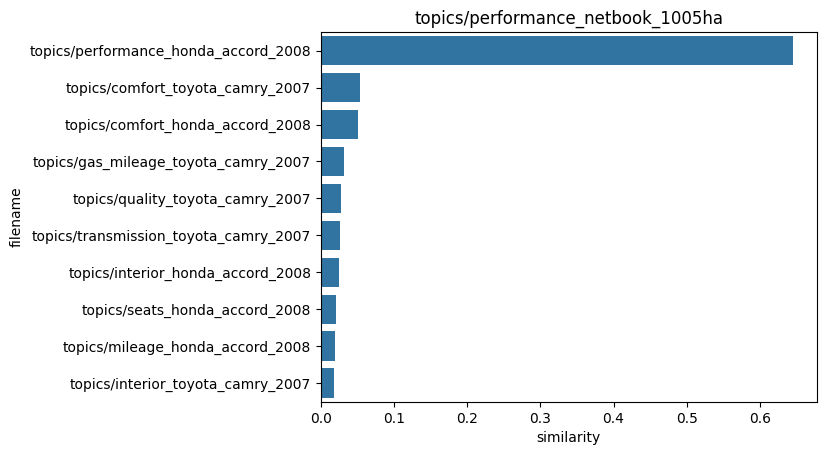

In [58]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)